In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Consumer Goods'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': []}
{'data': []}
{'data': [{'code': 'APTV', 'name': 'Aptiv PLC', 'last_day_data_date': '2024-06-14', 'adjusted_close': 70.3, 'refund_1d': -4.21, 'refund_1d_p': -5.65, 'refund_5d': -11.12, 'refund_5d_p': -13.66, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 20271357952, 'earnings_share': 10.64, 'dividend_yield': None, 'sector': 'Consumer Cyclical', 'industry': 'Auto Parts', 'avgvol_1d': 3007356, 'avgvol_200d': 2486454.05}, {'code': 'GPC', 'name': 'Genuine Parts Co', 'last_day_data_date': '2024-06-14', 'adjusted_close': 136.7, 'refund_1d': -4.21, 'refund_1d_p': -2.99, 'refund_5d': -8.49, 'refund_5d_p': -5.85, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 19687946240, 'earnings_share': 8.98, 'dividend_yield': 0.0284, 'sector': 'Consumer Cyclical', 'industry': 'Auto Parts', 'avgvol_1d': 1159285, 'avgvol_200d': 1001188.59}, {'code': 'MGA', 'name': 'Magna International Inc', 'last_day_data_date': '2024-06-14', 'adjusted_close': 42.19, 'refun

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

APTV
GPC
MGA
ALV
BWA
LEA
ALSN
MOD
QS
ADNT
DAN
PHIN
AXL
MLR
SMP
PLOW
SES
SRI
HLLY
CYD
HYLN
CPS
SUP
FMX
BUD
ABEV
TAP-A
TAP
SAM
CCU
HSY
TR
ADM
TSN
BG
DOLE
FDP
AGRO
LND
LOCL
BALL
AVY
PKG
IP
AMCR
WRK
CCK
GPK
BERY
SON
SEE
SLGN
GEF
GEF-B
AMBP
OI
MYE
PACK
TUP
DSS
SUZ
SLVM
CLW
GLT
ITP
BC
THO
HOG
PII
LCII
WGO
MPX
SPG
SPG-PJ
O
KIM
FRT-PC
FRT
NNN
KIM-PM
KIM-PL
BRX
ADC
KRG
MAC
SITC
SKT
UE
FCPT
SITC-PA
AKR
IVT
GTY
BFS-PD
NTST
BFS
ALEX
ALX
CBL
WSR
PINE
CDR-PB
CDR-PC
BFS-PE
O-P
MBLY
LKQ
GNTX
GT
VC
DORM
FOXF
GTX
THRM
INVZW
XPEL
MNRO
LAZR
HSAI
ECX
CVGI
KNDI
INVZ
HYZN
CAAS
MPAA
STRT
WPRT
NCNC
CREV
SYPR
FRSX
WKSP
HYZNW
WKSPW
ECXWW
CREVW
MDLZ
RMCF
CALM
VITL
LMNR
AFRI
ALCO
VFF
DTCK
SISI
AAGR
SDOT
SANW
AQB
AGRI
EDBL
CHSCN
CHSCL
CHSCM
CHSCO
CHSCP
AGRIW
EDBLW
AFRIW
AAGRW
REYN
PTVE
TRS
KRT
YHGJ
MGIH
OCTO
MERC
DOOO
MBUU
MCFT
REE
VEEE
VMAR
FRZA
EZGO
MCOM
MAMO
FUVV
REG
PECO
ROIC
WHLRD
WHLR
WHLRP
REGCO
REGCP
error data for REGCP : 189
error data for REGCP : 190
error data for REGCP : 191
error data for REGCP : 192


In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [12]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


QS has no Dividend Paid
SES has no debt data in database
SRI has no Dividend Paid
HLLY has no Dividend Paid
CYD Couldn't get FCF error
HYLN has no Dividend Paid
SAM has no debt data in database
PACK has no Dividend Paid
GLT has no Dividend Paid
ITP has no Dividend Paid
MPX has no debt data in database
SPG-PJ Share probably zero: float division by zero
FRT-PC Share probably zero: float division by zero
KIM-PM Share probably zero: float division by zero
KIM-PL Share probably zero: float division by zero
SITC-PA Share probably zero: float division by zero
BFS-PD Share probably zero: float division by zero
CDR-PB Share probably zero: float division by zero
CDR-PC Share probably zero: float division by zero
BFS-PE Share probably zero: float division by zero
O-P EBITDA Zero error
MBLY has no debt data in database
FOXF has no Dividend Paid
GTX has no Dividend Paid
INVZW Share probably zero: float division by zero
LAZR has no Dividend Paid
HSAI has no Dividend Paid
ECX has no Dividend Paid
CVG

In [13]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

114
114
114
114
114


In [14]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Consumer Goods.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(50,'Debt'))
top_50s.append(positive_df.nlargest(50,'Dividend Yield'))
top_50s.append(positive_df.nlargest(50,'EPS Yield'))
top_50s.append(positive_df.nlargest(50,'FCF'))
worst_100s.append(positive_df.nlargest(50, 'Debt'))
worst_100s.append(positive_df.nsmallest(50, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(50, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(50, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [8]:
print(final_selection.shape)
print(final_selection)

(12, 5)
     Code       Debt  Dividend Yield  EPS Yield        FCF
1    CALM 0.00532147      0.05890306 0.08662964 0.09722261
4    ABEV 0.08724311      0.30500083 0.07661290 0.51636896
11    KRT 0.86337700      0.05170625 0.06296895 0.06775686
13   AGRO 1.10738497      0.04878527 0.17221521 0.33323674
15    LND 1.29456871      1.93705555 0.10804829 0.64667760
28    SMP 1.72863626      0.03487388 0.08330952 0.11667827
29    ADM 1.73323523      0.03200895 0.10176434 0.17124464
32    FDP 1.86660534      0.03305197 0.07408736 0.09655083
38   PLOW 2.35851519      0.04888630 0.05223881 0.06880992
44    SON 2.55133269      0.03547597 0.08686870 0.13113233
46   REYN 2.61483595      0.03224741 0.05541124 0.09136767
51  TAP-A 2.83060692      2.10171573 0.08720153 8.10612018


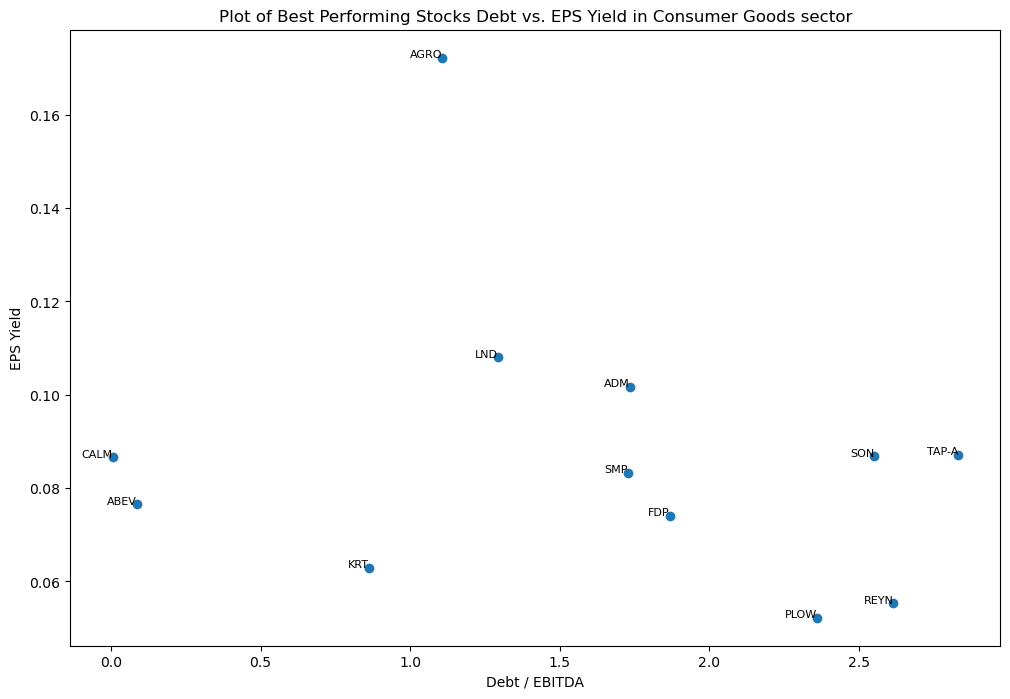

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('EPS Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield']) 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=8, ha='right')
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title)
plt.savefig('Best_Debt_EPS_fixed.png')
plt.show()

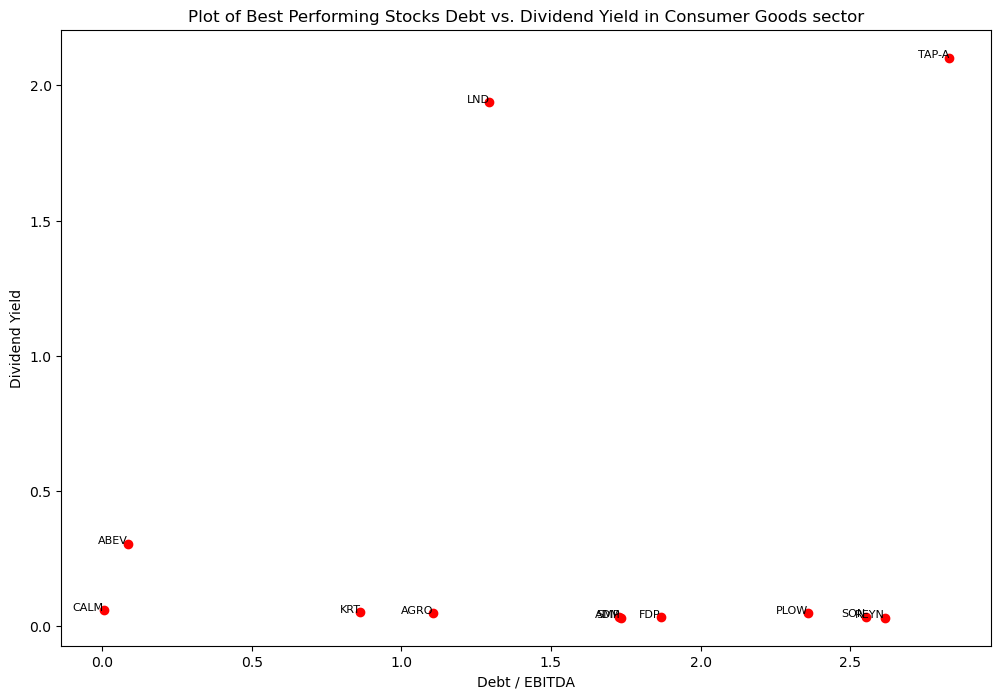

In [38]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('Dividend Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['Dividend Yield'], c='r') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title)
plt.savefig('Best_Debt_Div_fixed.png')
plt.show()

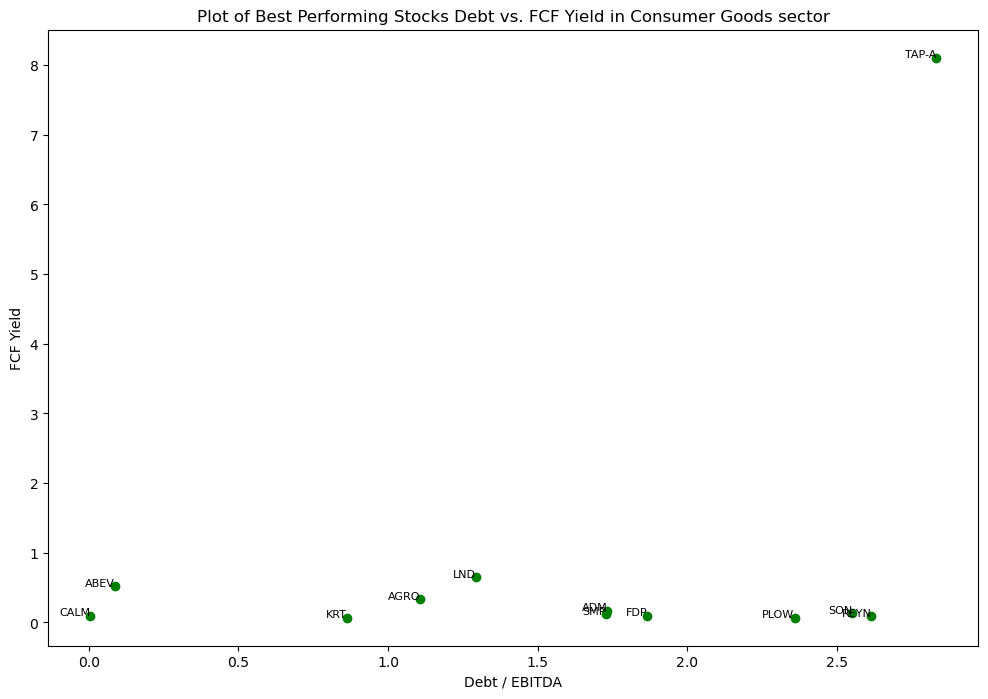

In [39]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('FCF Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['FCF'], c='g') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title)
plt.savefig('Best_Debt_FCF_fixed.png')
plt.show()

In [40]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [41]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [42]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


CALM
ABEV
KRT
AGRO
LND
SMP
ADM
FDP
PLOW
SON
REYN
TAP-A


In [43]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue

In [44]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [45]:
all_returns.append(GSPC_returns)

In [46]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [47]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

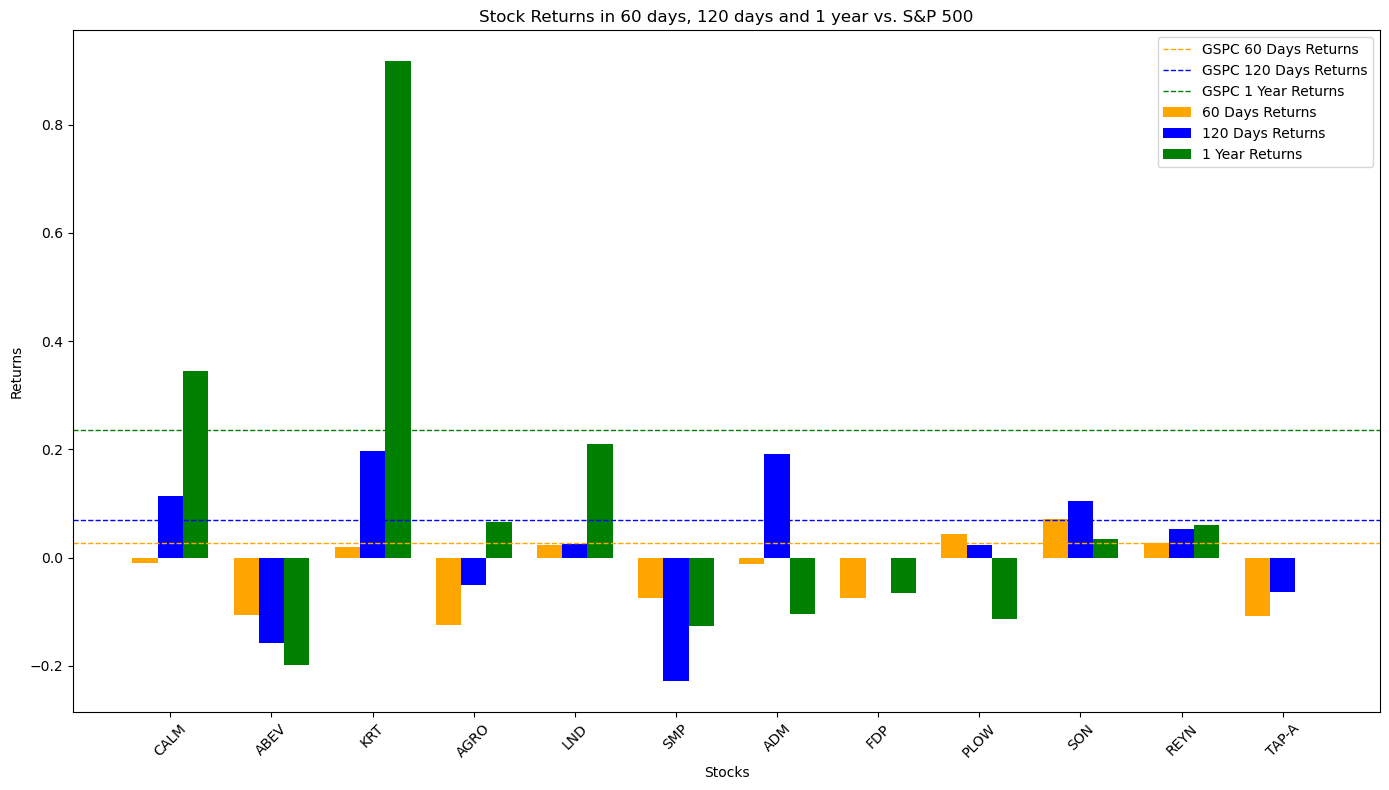

In [48]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [49]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is -2.71%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 1.69%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 8.53%
Return for Investing in S&P500 in 1 year is 23.62%


In [9]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

1      CALM
4      ABEV
11      KRT
13     AGRO
15      LND
28      SMP
29      ADM
32      FDP
38     PLOW
44      SON
46     REYN
51    TAP-A
Name: Code, dtype: object


In [10]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []

for s in code_list:
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

12


In [11]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[0.         0.04166488 0.04513782 0.03945351 0.0570496  0.0316807
 0.0542618  0.07854113 0.09460854 0.09665714 0.09011349 0.09205225
 0.09821193 0.09661321 0.07304204 0.07835054 0.07037224 0.05744253
 0.04534598 0.05659529 0.02458101 0.01640114 0.05122642 0.03522598
 0.06385044 0.0587041  0.07558435 0.07976816 0.11644326 0.1389494
 0.13067298 0.10844883 0.08643224 0.0721383  0.09019447 0.06364499
 0.08111185 0.08783736 0.06931883 0.07662612 0.08445365 0.07399453
 0.09747425 0.11093366 0.11513527 0.07744724 0.08610895 0.08619702
 0.08572847 0.09051335 0.10242025 0.0796365  0.08529059]


In [12]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [13]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Consumer Goods Sector is:  0.027385228469028796


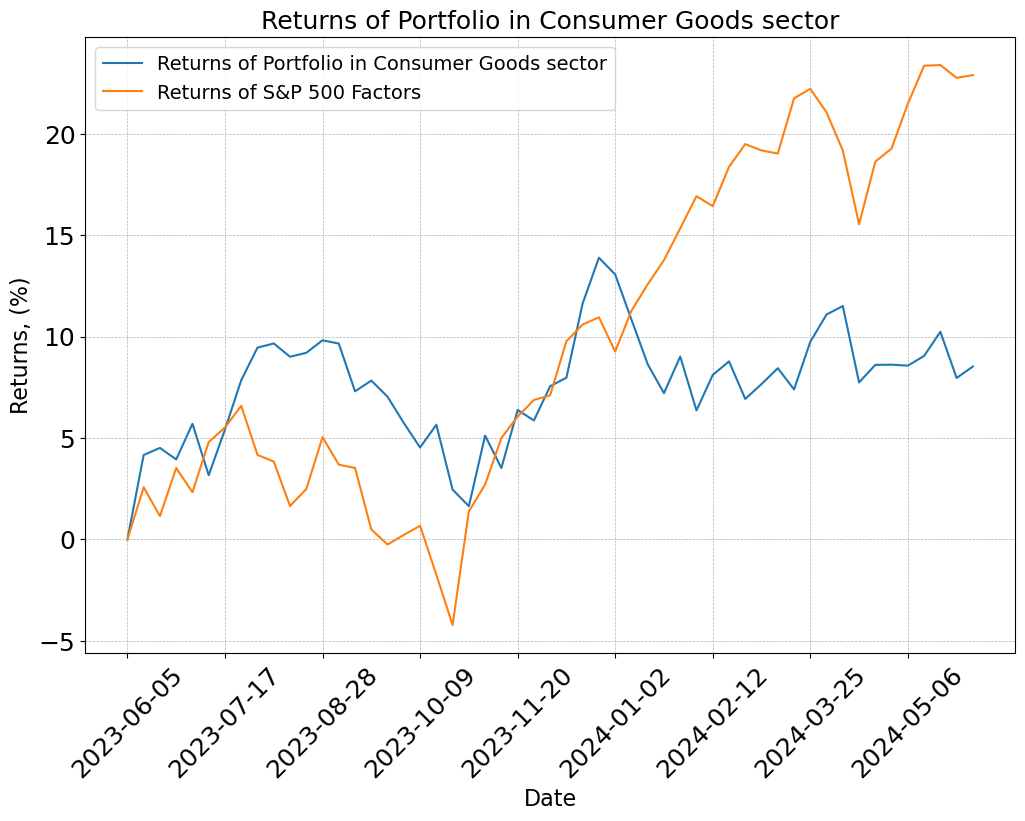

In [14]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()